In [1]:
#!/usr/bin/env python
# coding: utf-8

import sys
#sys.path.append('mnt/sw/nix/store/i4qqrrhx6cjsr6r2vl06h9fwbzc9qs8p-texlive-20210325/bin/x86_64-linux/')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 
from astropy import units as u
#import pynbody
#import healpy as hp
#from healpy.newvisufunc import projview, newprojplot

sys.path.append("../scripts/src/")
plt.style.use('../../MW_viz/matplotlib.mplstyle')


#import io_gizmo_pynbody as ga
#import halo_analysis as halo

# 
#import pynbody_routines as pr 
#import io_gizmo_pynbody as fa
#import plotting as pl

from scipy.linalg import norm
import h5py
#import itertools
from numpy import linalg as la

/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
"""

def host_velocities(sim):
    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)
    f = h5py.File(center_coordinates, 'r')
    vel = np.sqrt(np.sum(f['host.velocity'][1:,0]**2, axis=1))
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[1:], vel, f['host.velocity'][1:,:]
    
"""

'\n\ndef host_velocities(sim):\n    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)\n    f = h5py.File(center_coordinates, \'r\')\n    vel = np.sqrt(np.sum(f[\'host.velocity\'][1:,0]**2, axis=1))\n    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)\n    times = np.loadtxt(snap_times, usecols=3)\n    return times[1:], vel, f[\'host.velocity\'][1:,:]\n    \n'

In [3]:
"""
def sim_angmom(sim, snap, rmin, rmax):
    #sim='m12b'
    sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    m12i = fa.FIRE(sim, remove_satellite=True)
    sub_not_sat = m12i.subhalos(snap)
    d = np.sqrt(np.sum(sub_not_sat.dark['pos']**2, axis=1))
    mcut = np.where((np.log10(sub_not_sat.dark['mass']) > 7) & (d<rmax) & (d>rmin))
    #print('Mass', np.max((np.log10(sub_not_sat.dark['mass']))), len(mcut[0]))
    halo_kin = nba.kinematics.Kinematics(sub_not_sat.dark['pos'][mcut], sub_not_sat.dark['vel'][mcut])
    L  = halo_kin.part_angular_momentum()[:3]
    pos_r = L / norm(L, axis=0)
    x = np.where(np.abs(pos_r[0]) >= 0)
    Nsats = len(x[0])
    #print("Nsats=", len(x[0]))
    #x = np.isnan(pos_r[0])
    pos_rx = np.zeros((3, Nsats))
    pos_rx[0] = pos_r[0][x]
    pos_rx[1] = pos_r[1][x]
    pos_rx[2] = pos_r[2][x]
    lob, bop = halo_kin.orbpole()
    return pos_rx, lob, bop
    
"""

'\ndef sim_angmom(sim, snap, rmin, rmax):\n    #sim=\'m12b\'\n    sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)\n    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)\n    times = np.loadtxt(snap_times, usecols=3)\n    m12i = fa.FIRE(sim, remove_satellite=True)\n    sub_not_sat = m12i.subhalos(snap)\n    d = np.sqrt(np.sum(sub_not_sat.dark[\'pos\']**2, axis=1))\n    mcut = np.where((np.log10(sub_not_sat.dark[\'mass\']) > 7) & (d<rmax) & (d>rmin))\n    #print(\'Mass\', np.max((np.log10(sub_not_sat.dark[\'mass\']))), len(mcut[0]))\n    halo_kin = nba.kinematics.Kinematics(sub_not_sat.dark[\'pos\'][mcut], sub_not_sat.dark[\'vel\'][mcut])\n    L  = halo_kin.part_angular_momentum()[:3]\n    pos_r = L / norm(L, axis=0)\n    x = np.where(np.abs(pos_r[0]) >= 0)\n    Nsats = len(x[0])\n    #print("Nsats=", len(x[0]))\n    #x = np.isnan(pos_r[0])\n    pos_rx = np.zeros((3, Nsats))\n    pos_rx[0] = pos_r[0][x]\n 

In [4]:
def host_times(sim):
    snap_times = "../data/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[:] 

In [5]:
m12b_t = host_times('m12b')
m12i_t = host_times('m12i')


In [6]:
l_mean = []
b_mean = []
l_median = []
b_median = []

for i in range(20, 200, 10):
    mwlmc6 = np.loadtxt('../data/OP_statistics_MWLMC6_20_300_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    l_mean.append(mwlmc6[:,0])
    b_mean.append(mwlmc6[:,1])

    l_median.append(mwlmc6[:,2])
    b_median.append(mwlmc6[:,3])

OSError: ../data/OP_statistics_MWLMC6_20_300_snaps_020_030.txt not found.

ValueError: x and y must have same first dimension, but have shapes (180,) and (0,)

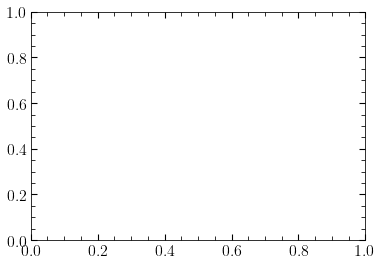

In [14]:
plt.plot(np.arange(0.4, 4, 0.02), np.array(l_mean).flatten()-180)
plt.plot(np.arange(0.4, 4, 0.02), np.array(b_mean).flatten())
plt.axvline(113*0.02, c='k', ls='--', lw=1.2)
plt.ylim(-1, 1)

### 

In [57]:
# Load data

In [6]:
hf_m12b = h5py.File('../data/subhalos/m12b_rotated_subhalo_cat_test.h5py', 'r')

In [7]:
hf_m12b_all = h5py.File('../data/subhalos/m12b_all_rotated_subhalo_cat.h5py', 'r')


In [8]:
hf_m12i = h5py.File('../data/subhalos/m12i_rotated_subhalo_cat.h5py', 'r')

In [9]:
hf_m12c = h5py.File('../data/subhalos/m12c_rotated_subhalo_cat.h5py', 'r')
hf_m12c_all = h5py.File('../data/subhalos/m12c_all_rotated_subhalo_cat.h5py', 'r')

hf_m12f = h5py.File('../data/subhalos/m12f_rotated_subhalo_cat.h5py', 'r')
hf_m12f_all = h5py.File('../data/subhalos/m12f_all_rotated_subhalo_cat.h5py', 'r')


hf_m12m = h5py.File('../data/subhalos/m12m_all_rotated_subhalo_cat.h5py', 'r')


hf_m12r = h5py.File('../data/subhalos/m12r_rotated_subhalo_cat.h5py', 'r')
hf_m12r_all = h5py.File('../data/subhalos/m12r_all_rotated_subhalo_cat.h5py', 'r')

hf_m12w = h5py.File('../data/subhalos/m12w_rotated_subhalo_cat.h5py', 'r')
hf_m12w_all = h5py.File('../data/subhalos/m12w_all_rotated_subhalo_cat.h5py', 'r')

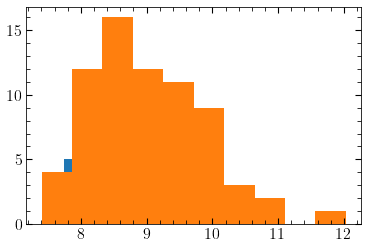

In [8]:
plt.hist(np.log10(hf_m12b['400']['stmass']));
plt.hist(np.log10(hf_m12b_all['400']['stmass']));

In [10]:
Nsubs_m12i = np.zeros((300, 5))
Nsubs_m12b = np.zeros((300, 5))

Nsubs_m12i_sat = np.zeros(300)
Nsubs_m12b_sat = np.zeros(300)
Nsubs_m12b_sat_all = np.zeros(300)

Nsubs_m12b_all = np.zeros((300, 5))

Nsubs_m12c_sat_all = np.zeros(300)
Nsubs_m12f_sat_all = np.zeros(300)
Nsubs_m12r_sat_all = np.zeros(300)
Nsubs_m12w_sat_all = np.zeros(300)


for k in range(300, 600):
    mcuts = np.arange(7, 9.1, 0.5)
    j=0
    mcuti_sat = np.where(np.log10(hf_m12i['{}'.format(k)]['stmass'])>0)
    mcutb_sat = np.where(np.log10(hf_m12b['{}'.format(k)]['stmass'])>0)
    mcutb_sat_all = np.where(np.log10(hf_m12b_all['{}'.format(k)]['stmass'])>0)
    mcutc_sat_all = np.where(np.log10(hf_m12c_all['{}'.format(k)]['stmass'])>0)
    mcutf_sat_all = np.where(np.log10(hf_m12f_all['{}'.format(k)]['stmass'])>0)
    mcutr_sat_all = np.where(np.log10(hf_m12r_all['{}'.format(k)]['stmass'])>0)
    mcutw_sat_all = np.where(np.log10(hf_m12w_all['{}'.format(k)]['stmass'])>0)

    Nsubs_m12i_sat[k-300] = len(mcuti_sat[0])
    Nsubs_m12b_sat[k-300] = len(mcutb_sat[0])
    Nsubs_m12b_sat_all[k-300] = len(mcutb_sat_all[0])

    Nsubs_m12c_sat_all[k-300] = len(mcutc_sat_all[0])
    Nsubs_m12f_sat_all[k-300] = len(mcutf_sat_all[0])
    Nsubs_m12r_sat_all[k-300] = len(mcutr_sat_all[0])
    Nsubs_m12w_sat_all[k-300] = len(mcutw_sat_all[0])

    for m in mcuts:
        mcuti = np.where(np.log10(hf_m12i['{}'.format(k)]['darkmass'])>m)
        mcutb = np.where(np.log10(hf_m12b['{}'.format(k)]['darkmass'])>m)
        mcutb_all = np.where(np.log10(hf_m12b_all['{}'.format(k)]['darkmass'])>m)
        Nsubs_m12i[k-300, j] = len(mcuti[0])
        Nsubs_m12b[k-300, j] = len(mcutb[0])
        Nsubs_m12b_all[k-300, j] = len(mcutb_all[0])
        
        j+=1

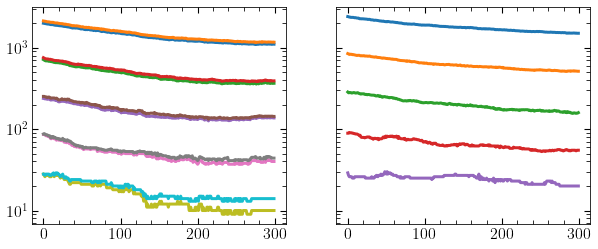

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10, 4), sharey=True)
for i in range(5):
    ax[0].semilogy(Nsubs_m12b[:,i])
    ax[0].semilogy(Nsubs_m12b_all[:,i])
    ax[1].semilogy(Nsubs_m12i[:,i])
    

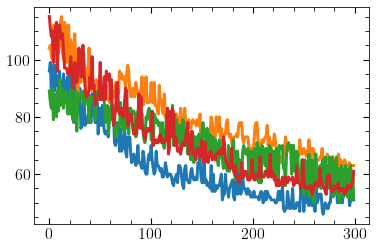

In [11]:
#plt.plot(Nsubs_m12b_sat)
plt.plot(Nsubs_m12b_sat_all)
#plt.plot(Nsubs_m12c_sat_all)
plt.plot(Nsubs_m12f_sat_all)
plt.plot(Nsubs_m12r_sat_all)
plt.plot(Nsubs_m12w_sat_all)
#plt.plot(Nsubs_m12i_sat)

In [12]:
pos = hf_m12b['300']['pos'][:]

In [11]:
#adopted from jsamu/sappy/kinematics

def orbpole(pos, vel):
    # Hacked from Ekta's code
    # r x v in cartesian coordinates!
    uu = np.cross(pos, vel)
    # |r.v|
    uumag = la.norm(uu, axis=1)
    u = uu.T/uumag
    b = np.arcsin(u[2])
    sinl = u[1]/np.cos(b)
    cosl = u[0]/np.cos(b)
    ll = np.arctan2(sinl,cosl)

    gl = np.degrees(ll)
    gb = np.degrees(b)
    return gl, gb

def orbital_pole_dispersion(pos, vel):
    '''
    Calculate the angular dispersion [deg] of satellite orbital poles around
    their mean orbital pole.
    '''
    j_vec = np.cross(pos,vel)
    j_mag = norm(j_vec, axis=1)
    j_vec_norm = j_vec.T/j_mag
    #j_vec = orbital_ang_momentum(hal, hal_mask, host_str=host_str, norm=True)
    avg_j_vec = np.nanmean(j_vec_norm.T, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec_norm.T, axis=0))
    #print(np.linalg.norm(np.nanmean(j_vec, axis=0)))
    avg_j_dot_j = np.array([np.dot(avg_j_vec, j_vec_i) for j_vec_i in j_vec_norm.T]) 
    pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
    pole_disp = np.degrees(pole_disp)
    return pole_disp, avg_j_vec

In [12]:
def get_poles_means(catalogue, mmin=7, dlims=[50, 300]):
    #k = 300
    lop_mean = np.zeros(300)
    bop_mean = np.zeros(300)
    
    lop_mean_st = np.zeros(300)
    bop_mean_st = np.zeros(300)

    for k in range(300, 600):
        mcut = np.where(np.log10(catalogue['{}'.format(k)]['darkmass'])>mmin)

        pos = catalogue['{}'.format(k)]['pos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        dcut = np.where((dist[mcut]>dlims[0]) & (dist[mcut]<dlims[1]))
        lop, bop = orbpole(catalogue['{}'.format(k)]['pos'], catalogue['{}'.format(k)]['vel'])
        lop_mean[k-300] = np.nanmean(lop[mcut][dcut])
        bop_mean[k-300] = np.nanmean(bop[mcut][dcut])
        
        
        pos = catalogue['{}'.format(k)]['stpos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        msat = np.where(np.log10(catalogue['{}'.format(k)]['stmass'])>0)
        dcut_sat = np.where((dist[msat]>dlims[0]) & (dist[msat]<dlims[1]))
        #m12_kin_sat = nba.kinematics.Kinematics(catalogue['{}'.format(k)]['pos'], catalogue['{}'.format(k)]['vel'])
        lop, bop = orbpole(catalogue['{}'.format(k)]['stpos'], catalogue['{}'.format(k)]['stvel'])
        lop_mean_st[k-300] = np.nanmean(lop[msat][dcut_sat])
        bop_mean_st[k-300] = np.nanmean(bop[msat][dcut_sat])
    return [lop_mean, bop_mean], [lop_mean_st, bop_mean_st]


def delta_k(pos_rx, k):
    npoints = np.shape(pos_rx)[1]
    #print(npoints)
    index = np.linspace(0, npoints-1, npoints)
    index_comb = np.array(list(itertools.combinations(index, k))).astype(int)
    #print(index_comb[0], len(index_comb), np.shape(index_comb))
    #print(np.shape(index_comb))
    x3 = np.zeros((len(index_comb), k))
    y3 = np.zeros((len(index_comb), k))
    z3 = np.zeros((len(index_comb), k))
    #print(index_comb[4])
    for i in range(len(x3)):
        #print(pos_rx.T[index_comb[i],0], x3[i], index_comb[i])
        #print(i, index_comb[i])
        x3[i] = pos_rx.T[index_comb[i],0]
        y3[i] = pos_rx.T[index_comb[i],1]
        z3[i] = pos_rx.T[index_comb[i],2]
    #print(x3[-1])
    #x3 = np.array(list(itertools.combinations(pos_rx.T[:,0], k)))
    #y3 = np.array(list(itertools.combinations(pos_rx.T[:,1], k)))
    #z3 = np.array(list(itertools.combinations(pos_rx.T[:,2], k)))
    #print(np.shape(x3), len(x3))
    #print(x3)
    delta_sph = np.zeros(len(x3))
    for n in range(len(x3)):
        x_mean = np.mean(x3[n])
        y_mean = np.mean(y3[n])
        z_mean = np.mean(z3[n])

        delta_sph_k = np.zeros(k)
        mean_vec = np.array([x_mean, y_mean, z_mean])/norm(np.array([x_mean, y_mean, z_mean]))
        for p in range(k):
            all_vec =  np.array([x3[n, p], y3[n, p], z3[n, p]])/norm(np.array([x3[n, p], y3[n, p], z3[n, p]]))
            delta_sph_k[p] = np.arccos((np.dot(mean_vec, all_vec)))*180/np.pi
            #print(delta_sph_k)
        delta_sph[n] = np.sqrt(np.sum(delta_sph_k**2, axis=0)/k)
    return np.min(delta_sph)

In [13]:
def get_poles_disp(catalogue, mmin=7, dlims=[50, 300]):
    #k = 300
    op_disp = np.zeros(300)
    op_disp_sat = np.zeros(300)
    
    
    for k in range(300, 600):
        mcut = np.where(np.log10(catalogue['{}'.format(k)]['darkmass'])>mmin)
        pos = catalogue['{}'.format(k)]['pos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        dcut = np.where((dist[mcut]>dlims[0]) & (dist[mcut]<dlims[1]))
        pos_cut = catalogue['{}'.format(k)]['pos'][mcut][dcut][:]
        vel_cut = catalogue['{}'.format(k)]['vel'][mcut][dcut][:]
        m12_kin, _ = orbital_pole_dispersion(pos_cut, vel_cut)
        op_disp[k-300] = m12_kin
        
        
        pos = catalogue['{}'.format(k)]['stpos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        msat = np.where(np.log10(catalogue['{}'.format(k)]['stmass'])>0)
        dcut_sat = np.where((dist[msat]>dlims[0]) & (dist[msat]<dlims[1]))
        #print(len())
        pos_cut = catalogue['{}'.format(k)]['stpos'][msat][dcut_sat][:]
        vel_cut = catalogue['{}'.format(k)]['stvel'][msat][dcut_sat][:]
        m12_sat, _ = orbital_pole_dispersion(pos_cut, vel_cut)
        op_disp_sat[k-300] = m12_sat
        
    return op_disp, op_disp_sat

In [21]:
mmin = 7
dmax = 150

out_m12b, out_m12b_sat  = get_poles_means(hf_m12b, dlims=[50, dmax], mmin=mmin)
in_m12b, in_m12b_sat = get_poles_means(hf_m12b, dlims=[0, 50], mmin=mmin)
in_m12b_all, in_m12b_all_sat = get_poles_means(hf_m12b_all, dlims=[0, 50], mmin=mmin)
out_m12b_all, out_m12b_all_sat = get_poles_means(hf_m12b_all, dlims=[50, dmax], mmin=mmin)

out_m12i, out_m12i_sat = get_poles_means(hf_m12i, dlims=[50, dmax], mmin=mmin)
in_m12i, in_m12i_sat = get_poles_means(hf_m12i, dlims=[0, 50], mmin=mmin)

out_m12c, out_m12c_sat  = get_poles_means(hf_m12c, dlims=[50, dmax], mmin=mmin)
out_m12c_all, out_m12c_all_sat = get_poles_means(hf_m12c_all, dlims=[50, dmax], mmin=mmin)

out_m12f, out_m12f_sat  = get_poles_means(hf_m12f, dlims=[50, dmax], mmin=mmin)
out_m12f_all, out_m12f_all_sat = get_poles_means(hf_m12f_all, dlims=[50, dmax], mmin=mmin)

out_m12r, out_m12r_sat  = get_poles_means(hf_m12r, dlims=[50, dmax], mmin=mmin)
out_m12r_all, out_m12r_all_sat = get_poles_means(hf_m12r_all, dlims=[50, dmax], mmin=mmin)

out_m12w, out_m12w_sat  = get_poles_means(hf_m12w, dlims=[50, 400], mmin=mmin)
out_m12w_all, out_m12w_all_sat = get_poles_means(hf_m12w_all, dlims=[50, dmax], mmin=mmin)

/tmp/ipykernel_166192/722929800.py:9: RuntimeWarning: invalid value encountered in divide
  u = uu.T/uumag
/tmp/ipykernel_166192/902596299.py:26: RuntimeWarning: Mean of empty slice
  lop_mean_st[k-300] = np.nanmean(lop[msat][dcut_sat])
/tmp/ipykernel_166192/902596299.py:27: RuntimeWarning: Mean of empty slice
  bop_mean_st[k-300] = np.nanmean(bop[msat][dcut_sat])


In [22]:
mmin = 7

out_m12b_d, out_m12b_d_sat = get_poles_disp(hf_m12b, mmin=mmin, dlims=[50, dmax])
in_m12b_d, in_m12b_d_sat = get_poles_disp(hf_m12b, dlims=[0, 50], mmin=mmin)

in_m12b_all_d, in_m12b_all_d_sat = get_poles_disp(hf_m12b_all, dlims=[0, 50], mmin=mmin)
out_m12b_all_d, out_m12b_all_d_sat = get_poles_disp(hf_m12b_all, mmin=mmin, dlims=[50, dmax])

out_m12i_d, out_m12i_d_sat = get_poles_disp(hf_m12i, dlims=[50, dmax], mmin=mmin)
in_m12i_d, in_m12i_d_sat = get_poles_disp(hf_m12i, dlims=[0, 50], mmin=mmin)


out_m12c_d, out_m12c_d_sat = get_poles_disp(hf_m12c, mmin=mmin, dlims=[50, dmax])
out_m12c_all_d, out_m12c_all_d_sat = get_poles_disp(hf_m12c_all, mmin=mmin, dlims=[50, dmax])


out_m12f_d, out_m12f_d_sat = get_poles_disp(hf_m12f, mmin=mmin, dlims=[50, dmax])
out_m12f_all_d, out_m12f_all_d_sat = get_poles_disp(hf_m12f_all, mmin=mmin, dlims=[50, dmax])


#out_m12m_d, out_m12m_d_sat = get_poles_disp(hf_m12m, mmin=mmin, dlims=[50, 400])
out_m12m_all_d, out_m12m_all_d_sat = get_poles_disp(hf_m12m, mmin=mmin, dlims=[50, dmax])



out_m12r_d, out_m12r_d_sat = get_poles_disp(hf_m12r, mmin=mmin, dlims=[50, dmax])
out_m12r_all_d, out_m12r_all_d_sat = get_poles_disp(hf_m12r_all, mmin=mmin, dlims=[50, dmax])


out_m12w_d, out_m12w_d_sat = get_poles_disp(hf_m12w, mmin=mmin, dlims=[50, dmax])
out_m12w_all_d, out_m12w_all_d_sat = get_poles_disp(hf_m12w_all, mmin=mmin, dlims=[50, dmax])


/tmp/ipykernel_166192/722929800.py:28: RuntimeWarning: Mean of empty slice
  avg_j_vec = np.nanmean(j_vec_norm.T, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec_norm.T, axis=0))
/tmp/ipykernel_166192/722929800.py:31: RuntimeWarning: Mean of empty slice
  pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
/tmp/ipykernel_166192/722929800.py:31: RuntimeWarning: invalid value encountered in arccos
  pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))


In [23]:
out_m12b_d2, out_m12b_d_sat2 = get_poles_disp(hf_m12b, mmin=9, dlims=[50, dmax])
in_m12b_d2, in_m12b_d_sat2 = get_poles_disp(hf_m12b, dlims=[0, 50], mmin=9)

in_m12b_all_d2, in_m12b_all_d_sat2 = get_poles_disp(hf_m12b_all, dlims=[0, 50], mmin=9)
out_m12b_all_d2, out_m12b_all_d_sat2 = get_poles_disp(hf_m12b_all, mmin=9, dlims=[50, dmax])

/tmp/ipykernel_166192/722929800.py:31: RuntimeWarning: invalid value encountered in arccos
  pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
/tmp/ipykernel_166192/722929800.py:31: RuntimeWarning: Mean of empty slice
  pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
/tmp/ipykernel_166192/722929800.py:28: RuntimeWarning: Mean of empty slice
  avg_j_vec = np.nanmean(j_vec_norm.T, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec_norm.T, axis=0))


In [24]:
mmin1 = 6
mmin2 = 7
mmin3 = 8
mmin4 = 8.5

out_m12b1, out_m12b_sat1  = get_poles_means(hf_m12b, dlims=[50, dmax], mmin=mmin1)
in_m12b1, in_m12b_sat1 = get_poles_means(hf_m12b, dlims=[0, 50], mmin=mmin1)
in_m12b_all1, in_m12b_all_sat1 = get_poles_means(hf_m12b_all, dlims=[0, 50], mmin=mmin1)
out_m12b_all1, out_m12b_all_sat1 = get_poles_means(hf_m12b_all, dlims=[50, dmax], mmin=mmin1)

out_m12i1, out_m12i_sat1 = get_poles_means(hf_m12i, dlims=[50, dmax], mmin=mmin1)
in_m12i1, in_m12i_sat1 = get_poles_means(hf_m12i, dlims=[0, 50], mmin=mmin1)

out_m12b2, out_m12b_sat1  = get_poles_means(hf_m12b, dlims=[50, dmax], mmin=mmin2)
in_m12b2, in_m12b_sat1 = get_poles_means(hf_m12b, dlims=[0, 50], mmin=mmin2)
in_m12b_all2, in_m12b_all_sat1 = get_poles_means(hf_m12b_all, dlims=[0, 50], mmin=mmin2)
out_m12b_all2, out_m12b_all_sat1 = get_poles_means(hf_m12b_all, dlims=[50, dmax], mmin=mmin2)

out_m12i2, out_m12i_sat1 = get_poles_means(hf_m12i, dlims=[50, dmax], mmin=mmin2)
in_m12i2, in_m12i_sat1 = get_poles_means(hf_m12i, dlims=[0, 50], mmin=mmin2)

out_m12b3, out_m12b_sat3  = get_poles_means(hf_m12b, dlims=[50, dmax], mmin=mmin3)
in_m12b3, in_m12b_sat3 = get_poles_means(hf_m12b, dlims=[0, 50], mmin=mmin3)
in_m12b_all3, in_m12b_all_sat3 = get_poles_means(hf_m12b_all, dlims=[0, 50], mmin=mmin3)
out_m12b_all3, out_m12b_all_sat3 = get_poles_means(hf_m12b_all, dlims=[50, dmax], mmin=mmin3)

out_m12i3, out_m12i_sat3 = get_poles_means(hf_m12i, dlims=[50, dmax], mmin=mmin3)
in_m12i3, in_m12i_sat3 = get_poles_means(hf_m12i, dlims=[0, 50], mmin=mmin3)

out_m12b4, out_m12b_sat4  = get_poles_means(hf_m12b, dlims=[50, dmax], mmin=mmin4)
in_m12b4, in_m12b_sat4 = get_poles_means(hf_m12b, dlims=[0, 50], mmin=mmin4)
in_m12b_all4, in_m12b_all_sat4 = get_poles_means(hf_m12b_all, dlims=[0, 50], mmin=mmin4)
out_m12b_all4, out_m12b_all_sat4 = get_poles_means(hf_m12b_all, dlims=[50, dmax], mmin=mmin4)

out_m12i4, out_m12i_sat4 = get_poles_means(hf_m12i, dlims=[50, dmax], mmin=mmin4)
in_m12i4, in_m12i_sat4 = get_poles_means(hf_m12i, dlims=[0, 50], mmin=mmin4)


/tmp/ipykernel_166192/722929800.py:9: RuntimeWarning: invalid value encountered in divide
  u = uu.T/uumag
/tmp/ipykernel_166192/902596299.py:26: RuntimeWarning: Mean of empty slice
  lop_mean_st[k-300] = np.nanmean(lop[msat][dcut_sat])
/tmp/ipykernel_166192/902596299.py:27: RuntimeWarning: Mean of empty slice
  bop_mean_st[k-300] = np.nanmean(bop[msat][dcut_sat])
/tmp/ipykernel_166192/902596299.py:16: RuntimeWarning: Mean of empty slice
  lop_mean[k-300] = np.nanmean(lop[mcut][dcut])
/tmp/ipykernel_166192/902596299.py:17: RuntimeWarning: Mean of empty slice
  bop_mean[k-300] = np.nanmean(bop[mcut][dcut])


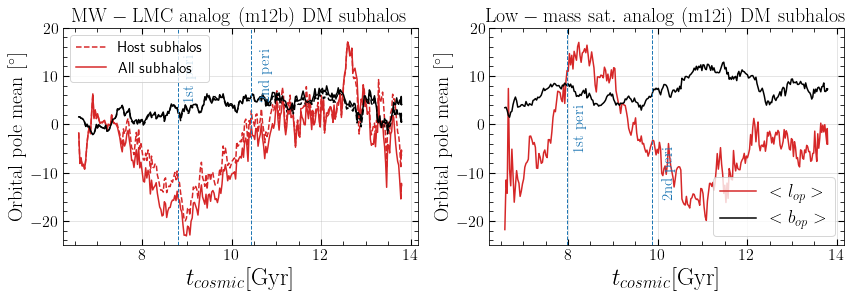

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharey=False)


#ax[0][0].plot(m12b_t[300:-1], in_m12b[0], c='C0', label=r'$<{l_{op}} >$')
#ax[0][0].plot(m12b_t[300:-1], in_m12b[1], c='k', label=r'$<{b_{op}} >$')

#ax[0][0].plot(m12b_t[300:-1], in_m12b_all[0], c='C0', ls='--')
#ax[0][0].plot(m12b_t[300:-1], in_m12b_all[1], c='k', ls='--')


ax[0].plot(m12b_t[300:-1], out_m12b[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)
ax[0].plot(m12b_t[300:-1], out_m12b[1], ls='--', c='k', lw=1.5)


ax[0].plot(m12b_t[300:-1], out_m12b_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)
ax[0].plot(m12b_t[300:-1], out_m12b_all[1], c='k', ls='-', lw=1.5)



#ax[0][1].plot(m12i_t[300:-1], in_m12i[0])
#ax[0][1].plot(m12i_t[300:-1], in_m12i[1], c='k')


ax[1].plot(m12i_t[300:-1], out_m12i[0], label=r'$<{l_{op}} >$', c='C3', lw=1.5)
ax[1].plot(m12i_t[300:-1], out_m12i[1], c='k', label=r'$<{b_{op}} >$', lw=1.5)


#ax[2].plot(np.arange(0.4, 4, 0.02), np.array(l_mean).flatten()-180)
#ax[2].plot(np.arange(0.4, 4, 0.02), 100*np.array(b_mean).flatten())
#ax[2].axvline(113*0.02, c='k', ls='--', lw=1.2)

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=18)
ax[0].axvline(m12b_t[385], ls='--', lw=1)
ax[0].axvline(m12b_t[449], ls='--', lw=1)

ax[1].axvline(m12i_t[353], ls='--', lw=1)
ax[1].axvline(m12i_t[426], ls='--', lw=1)

#ax[1].axvline(m12b_t[385], ls='--')
#ax[1].axvline(m12b_t[449], ls='--')

ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)
ax[0].set_ylim(-25, 20)
ax[1].set_ylim(-25, 20)

#ax[1][0].grid(alpha=0.4)
#ax[1][1].grid(alpha=0.4)

ax[0].text(8.9, 5.2, r'$\rm{1st\ peri}$', rotation=90, fontsize=15, c='C0')
ax[0].text(10.6, 5.2, r'$\rm{2nd\ peri}$', rotation=90, fontsize=15, c='C0')

ax[1].text(8.1, -5.2, r'$\rm{1st\ peri}$', rotation=90, fontsize=15, c='C0')
ax[1].text(10.1, -15.2, r'$\rm{2nd\ peri}$', rotation=90, fontsize=15, c='C0')


ax[0].set_title(r'$\rm{MW-LMC\ analog\ (m12b)\ DM\ subhalos}$', fontsize=20)
ax[1].set_title(r'$\rm{Low-mass\ sat.\ analog\ (m12i)\ DM\ subhalos}$', fontsize=20)

ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=24)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=24)
ax[0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')

plt.savefig('../plots/final_paper_plots/op_mean_outter_150.pdf', bbox_inches='tight')
plt.savefig('../plots/final_paper_plots/op_mean_outter_150.png', bbox_inches='tight')

Text(0, 0.5, '$\\rm{Orbital\\ pole\\ mean\\ [^{\\circ}]}$')

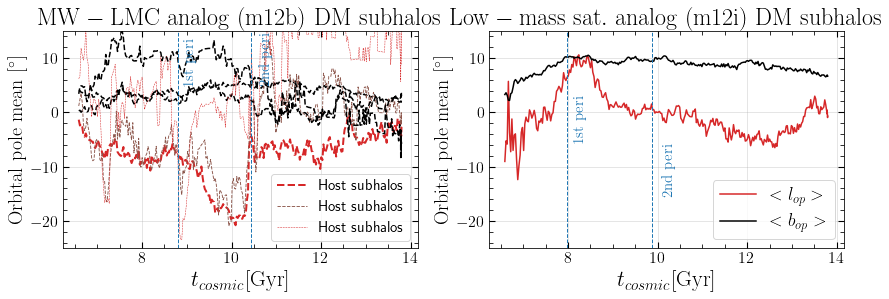

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharey=False)


#ax[0][0].plot(m12b_t[300:-1], in_m12b[0], c='C0', label=r'$<{l_{op}} >$')
#ax[0][0].plot(m12b_t[300:-1], in_m12b[1], c='k', label=r'$<{b_{op}} >$')

#ax[0][0].plot(m12b_t[300:-1], in_m12b_all[0], c='C0', ls='--')
#ax[0][0].plot(m12b_t[300:-1], in_m12b_all[1], c='k', ls='--')


ax[0].plot(m12b_t[300:-1], out_m12b1[0], ls ='--', c='C3', label='Host subhalos', lw=2)
ax[0].plot(m12b_t[300:-1], out_m12b1[1], ls='--', c='k', lw=1.5)

#ax[0].plot(m12b_t[300:-1], out_m12b2[0], ls ='--', c='C4', label='Host subhalos', lw=1.2)
#ax[0].plot(m12b_t[300:-1], out_m12b2[1], ls='--', c='k', lw=1.5)

ax[0].plot(m12b_t[300:-1], out_m12b3[0], ls ='--', c='C5', label='Host subhalos', lw=0.9)
ax[0].plot(m12b_t[300:-1], out_m12b3[1], ls='--', c='k', lw=1.5)

ax[0].plot(m12b_t[300:-1], out_m12b4[0], ls ='--', c='C3', label='Host subhalos', lw=0.5)
ax[0].plot(m12b_t[300:-1], out_m12b4[1], ls='--', c='k', lw=1.5)


#ax[0].plot(m12b_t[300:-1], out_m12b_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)
#ax[0].plot(m12b_t[300:-1], out_m12b_all[1], c='k', ls='-', lw=1.5)





#ax[0][1].plot(m12i_t[300:-1], in_m12i[0])
#ax[0][1].plot(m12i_t[300:-1], in_m12i[1], c='k')


ax[1].plot(m12i_t[300:-1], out_m12i1[0], label=r'$<{l_{op}} >$', c='C3', lw=1.5)
ax[1].plot(m12i_t[300:-1], out_m12i1[1], c='k', label=r'$<{b_{op}} >$', lw=1.5)

#ax[1].plot(m12i_t[300:-1], out_m12i2[0], lw=1.5, c='C4', ls='--')
#ax[1].plot(m12i_t[300:-1], out_m12i2[1], lw=1.5)


#ax[1].plot(m12i_t[300:-1], out_m12i3[0], lw=1.5, c='C5')
#ax[1].plot(m12i_t[300:-1], out_m12i3[1], c='k', lw=1.5)


#ax[1].plot(m12i_t[300:-1], out_m12i4[0], c='C3', lw=1.5)
#ax[1].plot(m12i_t[300:-1], out_m12i4[1], c='k', lw=1.5)


#ax[2].plot(np.arange(0.4, 4, 0.02), np.array(l_mean).flatten()-180)
#ax[2].plot(np.arange(0.4, 4, 0.02), 100*np.array(b_mean).flatten())
#ax[2].axvline(113*0.02, c='k', ls='--', lw=1.2)

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=18)
ax[0].axvline(m12b_t[385], ls='--', lw=1)
ax[0].axvline(m12b_t[449], ls='--', lw=1)

ax[1].axvline(m12i_t[353], ls='--', lw=1)
ax[1].axvline(m12i_t[426], ls='--', lw=1)


#ax[1].axvline(m12b_t[385], ls='--')
#ax[1].axvline(m12b_t[449], ls='--')

ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)
ax[0].set_ylim(-25, 15)
ax[1].set_ylim(-25, 15)

#ax[1][0].grid(alpha=0.4)
#ax[1][1].grid(alpha=0.4)

ax[0].text(8.9, 5.2, r'$\rm{1st\ peri}$', rotation=90, fontsize=15, c='C0')
ax[0].text(10.6, 5.2, r'$\rm{2nd\ peri}$', rotation=90, fontsize=15, c='C0')

ax[1].text(8.1, -5.2, r'$\rm{1st\ peri}$', rotation=90, fontsize=15, c='C0')
ax[1].text(10.1, -15.2, r'$\rm{2nd\ peri}$', rotation=90, fontsize=15, c='C0')


ax[0].set_title(r'$\rm{MW-LMC\ analog\ (m12b)\ DM\ subhalos}$')
ax[1].set_title(r'$\rm{Low-mass\ sat.\ analog\ (m12i)\ DM\ subhalos}$')

ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')

#plt.savefig('op_mean_outter.pdf', bbox_inches='tight')
#plt.savefig('op_mean_outter.png', bbox_inches='tight')

In [30]:
m12i_t[426]

9.86399325

In [14]:
# instead of 133 use 405 for DMAX 300
def rand_mean(catalogue, dmax):
    #catalogue = hf_m12b
    dlims=[50, dmax]
    lop_mean = np.zeros(300)
    bop_mean = np.zeros(300)
    nsample = 50
    nrand = np.random.randint(0, 133, nsample)

    for k in range(300, 600):
        mcut = np.where(np.log10(catalogue['{}'.format(k)]['darkmass'])>mmin)
        pos = catalogue['{}'.format(k)]['pos'][:]
        dist = np.sqrt(np.sum(pos**2, axis=1))
        dcut = np.where((dist[mcut]>dlims[0]) & (dist[mcut]<dlims[1]))
        lop, bop = orbpole(catalogue['{}'.format(k)]['pos'], catalogue['{}'.format(k)]['vel']);
        N = len(mcut[0][dcut[0]])
        lop_mean[k-300] = np.nanmean(lop[mcut][dcut][nrand])
        bop_mean[k-300] = np.nanmean(bop[mcut][dcut][nrand])
    return lop_mean, bop_mean


def rand_disp(catalogue, dmax):
    #catalogue = hf_m12b
    dlims=[50, dmax]
    op_disp = np.zeros(300)
    nsample = 50
    nrand = np.random.randint(0, 133, nsample)

    for k in range(300, 600):
        mcut = np.where(np.log10(catalogue['{}'.format(k)]['darkmass'])>mmin)
        pos = catalogue['{}'.format(k)]['pos'][:]
        vel = catalogue['{}'.format(k)]['vel'][:]

        dist = np.sqrt(np.sum(pos**2, axis=1))
        dcut = np.where((dist[mcut]>dlims[0]) & (dist[mcut]<dlims[1]))

        N = len(mcut[0][dcut[0]])
        m12_kin, _ = orbital_pole_dispersion(pos[dcut][nrand], vel[dcut][nrand])
        op_disp[k-300] = m12_kin
    return op_disp

/tmp/ipykernel_166192/722929800.py:9: RuntimeWarning: invalid value encountered in divide
  u = uu.T/uumag


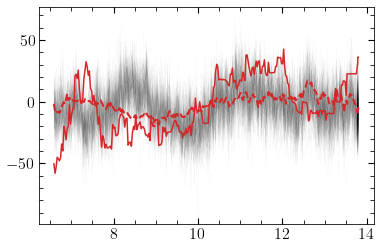

In [64]:
for i in range(100):
    lop_mean, bop_mean = rand_mean(hf_m12b, dmax=150)
    plt.plot(m12b_t[300:-1], lop_mean, ls ='-', c='k', label='Host subhalos', lw=0.1, alpha=0.1)

plt.plot(m12b_t[300:-1], out_m12b1[0], ls ='--', c='C3', label='Host subhalos', lw=2)
plt.plot(m12b_t[300:-1], out_m12b_all_sat[0], c='C3', ls='-', lw=1.5, label=r'$<{l_{op}} >$')



In [65]:
DMAX = 150
lop_rand_all = np.zeros((300, 300))
bop_rand_all = np.zeros((300, 300))

lop_rand_all_i = np.zeros((300, 300))
bop_rand_all_i = np.zeros((300, 300))

lop_rand_all_f = np.zeros((300, 300))
bop_rand_all_f = np.zeros((300, 300))

lop_rand_all_r = np.zeros((300, 300))
bop_rand_all_r = np.zeros((300, 300))

lop_rand_all_w = np.zeros((300, 300))
bop_rand_all_w = np.zeros((300, 300))

lop_rand_all_c = np.zeros((300, 300))
bop_rand_all_c = np.zeros((300, 300))


for i in range(300):
    lop_mean, bop_mean = rand_mean(hf_m12b, dmax=DMAX);
    lop_rand_all[i] = lop_mean
    bop_rand_all[i] = bop_mean
    
    lop_mean_i, bop_mean_i = rand_mean(hf_m12i, dmax=DMAX);
    lop_rand_all_i[i] = lop_mean_i
    bop_rand_all_i[i] = bop_mean_i
    
    lop_mean_f, bop_mean_f = rand_mean(hf_m12f, dmax=DMAX);
    lop_rand_all_f[i] = lop_mean_f
    bop_rand_all_f[i] = bop_mean_f
    
    lop_mean_r, bop_mean_r = rand_mean(hf_m12r, dmax=DMAX);
    lop_rand_all_r[i] = lop_mean_r
    bop_rand_all_r[i] = bop_mean_r
    
    lop_mean_w, bop_mean_w = rand_mean(hf_m12w, dmax=DMAX);
    lop_rand_all_w[i] = lop_mean_w
    bop_rand_all_w[i] = bop_mean_w
    
    lop_mean_c, bop_mean_c = rand_mean(hf_m12c, dmax=DMAX);
    lop_rand_all_c[i] = lop_mean_c
    bop_rand_all_c[i] = bop_mean_c

/tmp/ipykernel_166192/722929800.py:9: RuntimeWarning: invalid value encountered in divide
  u = uu.T/uumag


In [ ]:
## The two cells below take a while to run

In [66]:
disp_rand_all = np.zeros((300, 300))
disp_rand_all_i = np.zeros((300, 300))
disp_rand_all_r = np.zeros((300, 300))
disp_rand_all_f = np.zeros((300, 300))
disp_rand_all_w = np.zeros((300, 300))
disp_rand_all_c = np.zeros((300, 300))



for i in range(300):
    disp_rand_all[i] = rand_disp(hf_m12b, dmax=DMAX);
    disp_rand_all_i[i] = rand_disp(hf_m12i, dmax=DMAX);
    disp_rand_all_r[i] = rand_disp(hf_m12r, dmax=DMAX);
    disp_rand_all_f[i] = rand_disp(hf_m12f, dmax=DMAX);
    disp_rand_all_w[i] = rand_disp(hf_m12w, dmax=DMAX);
    disp_rand_all_c[i] = rand_disp(hf_m12c, dmax=DMAX);


In [68]:
disp_rand_all_m = np.zeros((300, 300))
for i in range(300):
    disp_rand_all_m[i] = rand_disp(hf_m12m, dmax=DMAX);

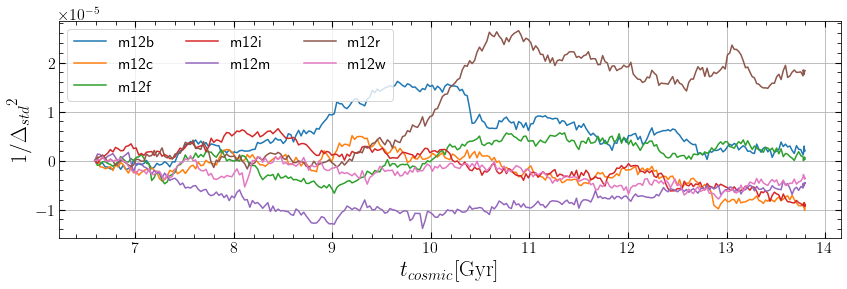

In [119]:
#plt.plot(1/np.mean(disp_rand_all, axis=0)**2)

plt.figure(figsize=(14, 4))

plt.plot(m12b_t[300:-1], 1/out_m12b_d**2 - 1/out_m12b_d[0]**2, lw=1.5, label='m12b')
plt.plot(m12b_t[300:-1], 1/out_m12c_d**2 - 1/out_m12c_d[0]**2, lw=1.5, label='m12c')
plt.plot(m12b_t[300:-1], 1/out_m12f_d**2 - 1/out_m12f_d[0]**2, lw=1.5, label='m12f')
plt.plot(m12b_t[300:-1], 1/out_m12i_d**2 - 1/out_m12i_d[0]**2, lw=1.5, label='m12i')
plt.plot(m12b_t[300:-1], 1/out_m12m_all_d**2 - 1/out_m12m_all_d[0]**2, lw=1.5, label='m12m')
plt.plot(m12b_t[300:-1], 1/out_m12r_d**2 - 1/out_m12r_d[0]**2, lw=1.5, label='m12r')
plt.plot(m12b_t[300:-1], 1/out_m12w_d**2 - 1/out_m12w_d[0]**2, lw=1.5, label='m12w')
plt.legend(ncol=3, fontsize=16)
plt.xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
plt.ylabel(r'$1/{\Delta_{std}}^2$', fontsize=22)

plt.grid()
plt.savefig('inv_square_disp_all_halos.png', bbox_inches='tight')
#plt.plot(1/np.mean(disp_rand_all_i, axis=0)**2)

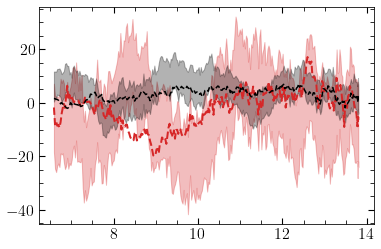

In [70]:
lop_std = np.std(lop_rand_all, axis=0)
bop_std = np.std(bop_rand_all, axis=0)


lop_std_i = np.std(lop_rand_all_i, axis=0)
bop_std_i = np.std(bop_rand_all_i, axis=0)


plt.fill_between(m12b_t[300:-1], np.mean(lop_rand_all, axis=0)-lop_std, np.mean(lop_rand_all, axis=0)+lop_std, color='C3', alpha=0.3)
plt.fill_between(m12b_t[300:-1], np.mean(bop_rand_all, axis=0)-bop_std, np.mean(bop_rand_all, axis=0)+bop_std, color='k', alpha=0.3)

plt.plot(m12b_t[300:-1], out_m12b1[0], ls ='--', c='C3', label='Host subhalos', lw=2)
plt.plot(m12b_t[300:-1], out_m12b1[1], ls='--', c='k', lw=1.5)


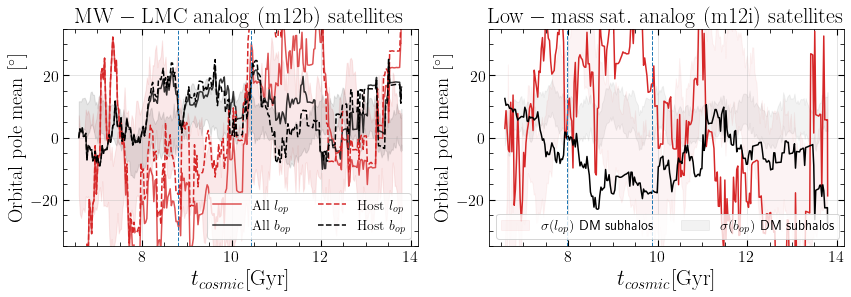

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharey=False)


#ax[0].plot(m12b_t[300:-1], out_m12b_sat[0], c='C3', ls='--')
#ax[0].plot(m12b_t[300:-1], out_m12b_sat[1], c='k', ls='--')

ax[0].fill_between(m12b_t[300:-1], np.mean(lop_rand_all, axis=0)-lop_std, 
                   np.mean(lop_rand_all, axis=0)+lop_std, color='C3', alpha=0.1)
ax[0].fill_between(m12b_t[300:-1], np.mean(bop_rand_all, axis=0)-bop_std, 
                   np.mean(bop_rand_all, axis=0)+bop_std, color='k', alpha=0.1)


ax[0].plot(m12b_t[300:-1], out_m12b_all_sat[0], c='C3', ls='-', lw=1.5, alpha=0.8, label=r'${\rm{All}}\ l_{op}$')
ax[0].plot(m12b_t[300:-1], out_m12b_all_sat[1], c='k', ls='-', lw=1.5, alpha=0.8, label=r'${\rm{All}}\ b_{op}$')


ax[0].plot(m12b_t[300:-1], out_m12b_sat[0], c='C3', ls='--', lw=1.5, label=r'${\rm{Host}}\ l_{op}$')
ax[0].plot(m12b_t[300:-1], out_m12b_sat[1], c='k', ls='--', lw=1.5, label=r'${\rm{Host}}\ b_{op}$')


ax[1].fill_between(m12b_t[300:-1], np.mean(lop_rand_all_i, axis=0)-lop_std_i, 
                   np.mean(lop_rand_all_i, axis=0)+lop_std, color='C3', alpha=0.05, label=r'$\sigma(l_{op})$ DM subhalos')
ax[1].fill_between(m12b_t[300:-1], np.mean(bop_rand_all_i, axis=0)-bop_std_i, 
                   np.mean(bop_rand_all_i, axis=0)+bop_std, color='k', alpha=0.05, label=r'$\sigma(b_{op})$ DM subhalos')


ax[1].plot(m12b_t[300:-1], out_m12i_sat[0], c='C3', ls='-',  lw=1.5)
ax[1].plot(m12b_t[300:-1], out_m12i_sat[1], c='k', ls='-', lw=1.5)




ax[0].axvline(m12b_t[385], ls='--', lw=1)
ax[0].axvline(m12b_t[449], ls='--', lw=1)
ax[1].axvline(m12b_t[353], ls='--', lw=1)
ax[1].axvline(m12i_t[426], ls='--', lw=1)


ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)

ax[1].legend(fontsize=14, ncol=2, loc='lower left')
ax[0].legend(fontsize=14, ncol=2)

ax[0].set_title(r'$\rm{MW-LMC\ analog\ (m12b)\ satellites}$', fontsize=22)
ax[1].set_title(r'$\rm{Low-mass\ sat.\ analog\ (m12i)\ satellites}$', fontsize=22)

ax[0].set_ylim(-35, 35)
ax[1].set_ylim(-35, 35)

ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')

plt.savefig('op_mean_outter_sat_150.pdf', bbox_inches='tight')
plt.savefig('op_mean_outter_sat_150.png', bbox_inches='tight')

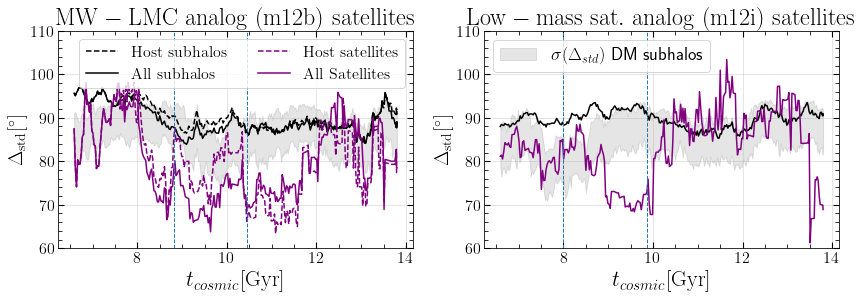

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=False)


#ax[0].plot(m12b_t[300:-1], in_m12b_d, c='k', alpha=0.3)
#ax[0].plot(m12b_t[300:-1], in_m12b_all_d, c='k', ls='--', alpha=0.3)


disp_std = np.std(disp_rand_all, axis=0)
disp_std_i = np.std(disp_rand_all_i, axis=0)


ax[0].fill_between(m12b_t[300:-1], np.mean(disp_rand_all, axis=0)-disp_std, 
                   np.mean(disp_rand_all, axis=0)+disp_std, color='k', alpha=0.1)

ax[0].plot(m12b_t[300:-1], out_m12b_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='--', lw=1.5)
ax[0].plot(m12b_t[300:-1], out_m12b_all_d, c='k', ls='-', label=r'$\rm{All\ subhalos}$', lw=1.5)


#ax[0].plot(m12b_t[300:-1], out_m12b_d2, c='k', alpha=0.8, label=r'$\rm{Host\ subhalos}$', ls='--', lw=1.5)
#ax[0].plot(m12b_t[300:-1], out_m12b_all_d2, c='k', alpha=0.8, ls='-', label=r'$\rm{All\ subhalos}$', lw=1.5)


ax[0].plot(m12b_t[300:-1], out_m12b_d_sat, c='purple', ls='--', label=r'$\rm{Host\ satellites}$', lw=1.5)
ax[0].plot(m12b_t[300:-1], out_m12b_all_d_sat, c='purple', ls='-', label=r'$\rm{All\ Satellites}$', lw=1.5)


ax[1].fill_between(m12b_t[300:-1], np.mean(disp_rand_all_i, axis=0)-disp_std_i, 
                   np.mean(disp_rand_all_i, axis=0)+disp_std_i, color='k', alpha=0.1, label=r'$\sigma(\Delta_{std})$ DM subhalos')

#ax[1].plot(m12i_t[300:-1], in_m12i_d, c='k', alpha=0.3, label=r'$\rm{Inner\ halo}$')
ax[1].plot(m12i_t[300:-1], out_m12i_d, c='k', lw=1.5, )
ax[1].plot(m12i_t[300:-1], out_m12i_d_sat, c='purple', lw=1.5)


#ax[0].legend(fontsize=18)
ax[0].axvline(m12b_t[385], ls='--', c='C0', lw=1)
ax[0].axvline(m12b_t[449], ls='--', c='C0', lw=1)
ax[1].axvline(m12i_t[353], ls='--', c='C0', lw=1)
ax[1].axvline(m12i_t[426], ls='--', c='C0', lw=1)

#ax[0].axvline(85)
#ax[0].axvline(149)

ax[0].set_title('m12b')
ax[1].set_title('m12i')

ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)

ax[0].legend(fontsize=16, ncol=2)
ax[1].legend(fontsize=18)
#ax[0].legend(fontsize=18)
ax[0].set_ylim(60, 110)
ax[1].set_ylim(60, 110)

ax[0].set_title(r'$\rm{MW-LMC\ analog\ (m12b)\ satellites}$')
ax[1].set_title(r'$\rm{Low-mass\ sat.\ analog\ (m12i)\ satellites}$')


ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0].set_ylabel(r'$\rm{\Delta_{std} [^{\circ}]}$')
ax[1].set_ylabel(r'$\rm{\Delta_{std} [^{\circ}]}$')

plt.savefig('../plots/final_paper_plots/op_disp_m12b_m12i_150.pdf', bbox_inches='tight')
plt.savefig('../plots/final_paper_plots/op_disp_m12b_m12i_150.png', bbox_inches='tight')

In [74]:
"""
fig, ax = plt.subplots(2, 2, figsize=(14, 8), sharey=True)


ax[0][0].plot(m12b_t[300:-1], out_m12c[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)
ax[0][0].plot(m12b_t[300:-1], out_m12c[1], ls='--', c='k', lw=1.5)
ax[0][0].fill_between(m12b_t[300:-1], np.mean(lop_rand_all_c, axis=0)-np.std(lop_rand_all_c, axis=0), 
                      np.mean(lop_rand_all_c, axis=0)+np.std(lop_rand_all_c, axis=0), color='C3', alpha=0.3)


ax[0][0].plot(m12b_t[300:-1], out_m12c_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)
ax[0][0].plot(m12b_t[300:-1], out_m12c_all[1], c='k', ls='-', lw=1.5)

ax[0][1].plot(m12b_t[300:-1], out_m12f[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)
ax[0][1].plot(m12b_t[300:-1], out_m12f[1], ls='--', c='k', lw=1.5)
ax[0][1].plot(m12b_t[300:-1], out_m12f_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)
ax[0][1].plot(m12b_t[300:-1], out_m12f_all[1], c='k', ls='-', lw=1.5)


ax[1][0].plot(m12b_t[300:-1], out_m12r[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)
ax[1][0].plot(m12b_t[300:-1], out_m12r[1], ls='--', c='k', lw=1.5)

ax[1][0].plot(m12b_t[300:-1], out_m12r_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)
ax[1][0].plot(m12b_t[300:-1], out_m12r_all[1], c='k', ls='-', lw=1.5)


ax[1][1].plot(m12b_t[300:-1], out_m12w[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)
ax[1][1].plot(m12b_t[300:-1], out_m12w[1], ls='--', c='k', lw=1.5)

ax[1][1].plot(m12b_t[300:-1], out_m12w_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)
ax[1][1].plot(m12b_t[300:-1], out_m12w_all[1], c='k', ls='-', lw=1.5)


ax[0][0].legend(fontsize=18)
ax[0][0].axvline(m12b_t[549], c='C0', ls='--', lw=1.5)
ax[0][1].axvline(m12b_t[462], c='C0', ls='--', lw=1.5)
ax[1][0].axvline(m12b_t[477], c='C0', ls='--', lw=1.5)
ax[1][0].axvline(m12b_t[515], c='C0', ls='--', lw=1.5)
ax[1][0].axvline(m12b_t[560], c='C0', ls='--', lw=1.5)
ax[1][1].axvline(m12b_t[358], c='C0', ls='--', lw=1.5)
ax[1][1].axvline(m12b_t[490], c='C0', ls='--', lw=1.5)


ax[0][0].set_title(r'$\rm{m12c}$')
ax[0][1].set_title(r'$\rm{m12f}$')
ax[1][0].set_title(r'$\rm{m12r}$')
ax[1][1].set_title(r'$\rm{m12w}$')

ax[0][0].set_xlim(6.5, 14)


ax[1][0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1][1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[0][0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')
ax[1][0].set_ylabel(r'$\rm{Orbital\ pole\ mean\ [^{\circ}]}$')

ax[0][0].grid(alpha=0.3)
ax[0][1].grid(alpha=0.3)
ax[1][0].grid(alpha=0.3)
ax[1][1].grid(alpha=0.3)
"""

"\nfig, ax = plt.subplots(2, 2, figsize=(14, 8), sharey=True)\n\n\nax[0][0].plot(m12b_t[300:-1], out_m12c[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)\nax[0][0].plot(m12b_t[300:-1], out_m12c[1], ls='--', c='k', lw=1.5)\nax[0][0].fill_between(m12b_t[300:-1], np.mean(lop_rand_all_c, axis=0)-np.std(lop_rand_all_c, axis=0), \n                      np.mean(lop_rand_all_c, axis=0)+np.std(lop_rand_all_c, axis=0), color='C3', alpha=0.3)\n\n\nax[0][0].plot(m12b_t[300:-1], out_m12c_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)\nax[0][0].plot(m12b_t[300:-1], out_m12c_all[1], c='k', ls='-', lw=1.5)\n\nax[0][1].plot(m12b_t[300:-1], out_m12f[0], ls ='--', c='C3', label='Host subhalos', lw=1.5)\nax[0][1].plot(m12b_t[300:-1], out_m12f[1], ls='--', c='k', lw=1.5)\nax[0][1].plot(m12b_t[300:-1], out_m12f_all[0], c='C3', ls='-', label='All subhalos', lw=1.5)\nax[0][1].plot(m12b_t[300:-1], out_m12f_all[1], c='k', ls='-', lw=1.5)\n\n\nax[1][0].plot(m12b_t[300:-1], out_m12r[0], ls ='--', c='C

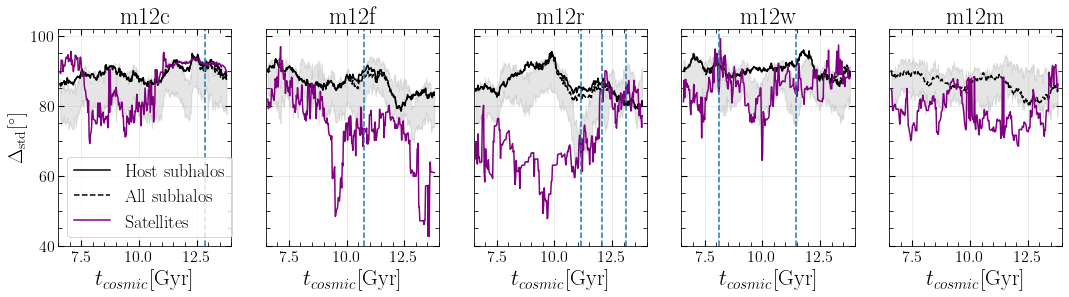

In [82]:
fig, ax = plt.subplots(1, 5, figsize=(18, 4), sharex=True, sharey=True)

disp_std_c = np.std(disp_rand_all_c, axis=0)
disp_std_f = np.std(disp_rand_all_f, axis=0)
disp_std_r = np.std(disp_rand_all_r, axis=0)
disp_std_w = np.std(disp_rand_all_w, axis=0)
disp_std_m = np.std(disp_rand_all_m, axis=0)



#ax[0].plot(m12b_t[300:-1], in_m12b_d, c='k', alpha=0.3)
#ax[0].plot(m12b_t[300:-1], in_m12b_all_d, c='k', ls='--', alpha=0.3)


ax[0].plot(m12b_t[300:-1], out_m12c_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='-', lw=1.5)
ax[0].plot(m12b_t[300:-1], out_m12c_all_d, c='k', ls='--', label=r'$\rm{All\ subhalos}$', lw=1.5)

ax[0].plot(m12b_t[300:-1], out_m12c_d_sat, c='purple', ls='-', lw=1.5, label=r'$\rm{Satellites}$')
#ax[0][0].plot(m12b_t[300:-1], out_m12c_all_d_sat, c='purple', ls='-', label=r'$\rm{Satellites}$', lw=1.5)

ax[0].fill_between(m12b_t[300:-1], np.mean(disp_rand_all_c, axis=0)-disp_std_c, 
                   np.mean(disp_rand_all_c, axis=0)+disp_std_c, color='k', alpha=0.1)


ax[1].plot(m12b_t[300:-1], out_m12f_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='-', lw=1.5)
ax[1].plot(m12b_t[300:-1], out_m12f_all_d, c='k', ls='--', label=r'$\rm{All\ subhalos}$', lw=1.5)

ax[1].plot(m12b_t[300:-1], out_m12f_d_sat, c='purple', ls='-', lw=1.5)
#ax[0][1].plot(m12b_t[300:-1], out_m12f_all_d_sat, c='purple', ls='-', label=r'$\rm{Satellites}$', lw=1.5)


ax[1].fill_between(m12b_t[300:-1], np.mean(disp_rand_all_f, axis=0)-disp_std_f, 
                   np.mean(disp_rand_all_f, axis=0)+disp_std_f, color='k', alpha=0.1)




ax[2].plot(m12b_t[300:-1], out_m12r_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='-', lw=1.5)
ax[2].plot(m12b_t[300:-1], out_m12r_all_d, c='k', ls='--', label=r'$\rm{All\ subhalos}$', lw=1.5)

ax[2].plot(m12b_t[300:-1], out_m12r_d_sat, c='purple', ls='-', lw=1.5)
#ax[1][0].plot(m12b_t[300:-1], out_m12r_all_d_sat, c='purple', ls='-', label=r'$\rm{Satellites}$', lw=1.5)

ax[2].fill_between(m12b_t[300:-1], np.mean(disp_rand_all_r, axis=0)-disp_std_r, 
                   np.mean(disp_rand_all_r, axis=0)+disp_std_r, color='k', alpha=0.1)




ax[3].plot(m12b_t[300:-1], out_m12w_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='-', lw=1.5)
ax[3].plot(m12b_t[300:-1], out_m12w_all_d, c='k', ls='--', label=r'$\rm{All\ subhalos}$', lw=1.5)
ax[3].plot(m12b_t[300:-1], out_m12w_d_sat, c='purple', ls='-', lw=1.5, label=r'$\rm{Satellites}$')
#ax[1][1].plot(m12b_t[300:-1], out_m12w_all_d_sat, c='purple', ls='-', label=r'$\rm{Satellites}$', lw=1.5)


ax[3].fill_between(m12b_t[300:-1], np.mean(disp_rand_all_w, axis=0)-disp_std_w, 
                   np.mean(disp_rand_all_w, axis=0)+disp_std_w, color='k', alpha=0.1)



#ax[4].plot(m12b_t[300:-1], out_m12m_d, c='k', label=r'$\rm{Host\ subhalos}$', ls='-', lw=1.5)
ax[4].plot(m12b_t[300:-1], out_m12m_all_d, c='k', ls='--', label=r'$\rm{All\ subhalos}$', lw=1.5)
ax[4].plot(m12b_t[300:-1], out_m12m_all_d_sat, c='purple', ls='-', lw=1.5, label=r'$\rm{Satellites}$')
#ax[4].plot(m12b_t[300:-1], out_m12m_all_d_sat, c='purple', ls='-', label=r'$\rm{Satellites}$', lw=1.5)


ax[4].fill_between(m12b_t[300:-1], np.mean(disp_rand_all_m, axis=0)-disp_std_w, 
                   np.mean(disp_rand_all_m, axis=0)+disp_std_m, color='k', alpha=0.1)




ax[0].legend(fontsize=18)
ax[0].axvline(m12b_t[549], c='C0', ls='--', lw=1.5)
ax[1].axvline(m12b_t[462], c='C0', ls='--', lw=1.5)
ax[2].axvline(m12b_t[477], c='C0', ls='--', lw=1.5)
ax[2].axvline(m12b_t[515], c='C0', ls='--', lw=1.5)
ax[2].axvline(m12b_t[560], c='C0', ls='--', lw=1.5)
ax[3].axvline(m12b_t[358], c='C0', ls='--', lw=1.5)
ax[3].axvline(m12b_t[490], c='C0', ls='--', lw=1.5)

ax[0].set_title(r'$\rm{m12c}$')
ax[1].set_title(r'$\rm{m12f}$')
ax[2].set_title(r'$\rm{m12r}$')
ax[3].set_title(r'$\rm{m12w}$')
ax[4].set_title(r'$\rm{m12m}$')

ax[0].set_xlim(6.5, 14)


ax[0].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[1].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[2].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[3].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)
ax[4].set_xlabel(r'$t_{cosmic}[\rm{Gyr}]$', fontsize=22)

ax[0].set_ylabel(r'$\rm{\Delta_{std} [^{\circ}]}$')
#ax[1][0].set_ylabel(r'$\rm{\Delta_{std} [^{\circ}]}$')

ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)
ax[2].grid(alpha=0.3)
ax[3].grid(alpha=0.3)
ax[4].grid(alpha=0.3)

plt.savefig('../plots/final_paper_plots/all_latte_subhalos_disp_150.pdf', bbox_inches='tight')
plt.savefig('../plots/final_paper_plots/all_latte_subhalos_disp_150.png', bbox_inches='tight')

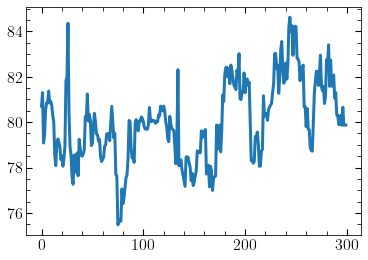

In [73]:
plt.plot(out_m12m_all_d_sat)

In [70]:
index = np.where(out_m12m_all_d_sat>85)

In [71]:
index

(array([126, 127, 128, 129, 133]),)

In [72]:
for i in index[0]:
    out_m12m_all_d_sat[i] = np.median(out_m12m_all_d_sat[i-5:i+5])

In [ ]:
# Select low mass subhalos with infall times similar to the luminous satellites! 
# Plot the dark subhalos for different mpeak thresholds. 
# recompute Dstd for 10^6 Mstar

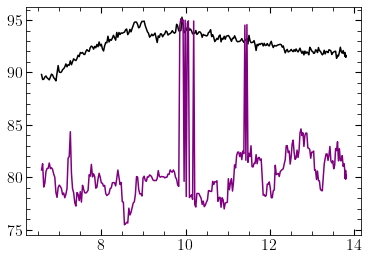

In [49]:
plt.plot(m12b_t[300:-1], out_m12m_all_d, c='k', ls='-', lw=1.5)
plt.plot(m12b_t[300:-1], out_m12m_all_d_sat, c='purple', ls='-', lw=1.5)


In [91]:
np.max(out_m12b_d_sat)

91.74973492006299

In [85]:
pos = hf_m12b_all['300']['stpos'][:]
dist = np.sqrt(np.sum(pos**2, axis=1))

msat = np.where(np.log10(hf_m12b_all['300']['stmass'])>0)
dcut_sat = np.where((dist[msat]>0) & (dist[msat]<800))
#print(len())
pos_cut = hf_m12b_all['300']['stpos'][msat][dcut_sat][:]

(-400.0, 400.0)

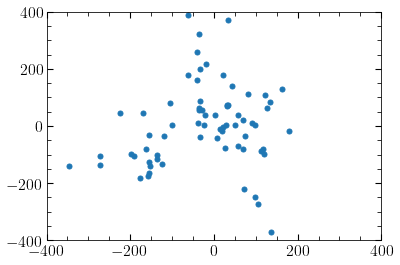

In [86]:
plt.scatter(pos_cut[:,0], pos_cut[:,1])
plt.xlim(-400, 400)
plt.ylim(-400, 400)

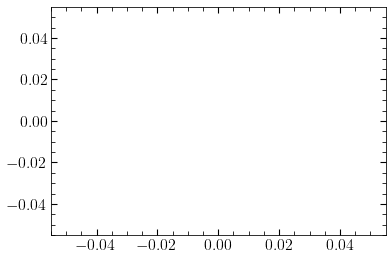

In [41]:
plt.plot(m12b_t[300:-1], in_m12b_all_d_sat, c='C3', ls='--')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\rm{\\Delta_{sph} [^{\\circ}]}$')

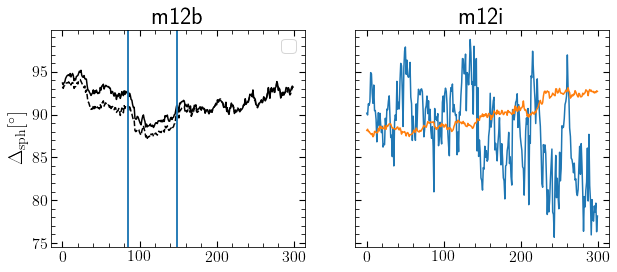

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
#ax[0].plot(in_m12b_d, c='C0', label=r'$<{l_{op}} >$')

#ax[0].plot(in_m12b_all_d, c='C0', ls='--')



ax[0].plot(m12out_m12b_d, c='k', label='subhalos')

ax[0].plot(out_m12b_all_d, c='k', ls='--',label='subhalos')


ax[1].plot(in_m12i_d)
ax[1].plot(out_m12i_d)


ax[0].legend(fontsize=18)
ax[0].axvline(85)
ax[0].axvline(149)

ax[0].axvline(85)
ax[0].axvline(149)

ax[0].set_title('m12b')
ax[1].set_title('m12i')


ax[0].set_ylabel(r'$\rm{\Delta_{sph} [^{\circ}]}$')



In [67]:
pos_dm1 = hf['300']['darkmass']


NameError: name 'hf' is not defined

In [ ]:
plt.scatter(pos_dm1[0,0], pos_dm1[0,1], s=1)


In [ ]:
mass = pos_dm1

In [ ]:
plt.hist(np.log10(pos_dm1))